**Yixuan Qiu**

Spring 2020

CS 251: Data Analysis and Visualization

Project 4: Principal Component Analysis

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

import pca_cov
import pca_svd

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 3: Implement PCA using singular value decomposition (SVD)

Implement and test the following methods necessary to perform PCA in `pca_svd.py`.

- `pca`: Perform PCA on the data using the SVD approach.

### 3a) Test SVD PCA with Iris dataset

- Load in the Iris dataset.
- Create a `PCA_SVD` object called `pca`, based on the iris data.

In [2]:
# Create PCA_SVD object here
iris_data = pd.read_csv('data/iris.csv')
df = pd.DataFrame(iris_data)
pca = pca_svd.PCA_SVD(df)

In [3]:
# Test pca (no normalization) here
iris_headers = list(iris_data.columns[:-1])
pca.pca(iris_headers)

# test that instance variable shape are correct
print(f'There are {len(pca.vars)} vars in Iris PCA and there should be 4.')
print(f'The original PCA data has shape {pca.A.shape} and should be (150, 4).')
print(f'Eigenvector shape: {pca.e_vecs.shape} should be (4, 4).\nEigenvalue shape: {pca.e_vals.shape} should be (4,).')
print(f'Length of proportion variance account for: {len(pca.get_prop_var())} should be 4.')
print(f'Length of cumulative proportion variance account for: {len(pca.get_cum_var())} should be 4.')
print()

# test values
print(f"Your vars in Iris PCA:\n{pca.vars}  and they should be\n['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']")
print(f'Your eigenvectors:\n{pca.e_vecs}. They should be\n[[ 0.36139 -0.65659 -0.58203  0.31549]\n [-0.08452 -0.73016  0.59791 -0.31972].\n [ 0.85667  0.17337  0.07624 -0.47984]\n[ 0.35829  0.07548  0.54583  0.75366]].')
print(f'Your eigenvalues:\n{pca.e_vals}. They should be\n[4.22824 0.24267 0.07821 0.02384]')
print(f'Cumulative proportion variance account for:\n{pca.get_cum_var()}. It should be\n[0.9246187232017271, 0.977685206318795, 0.9947878161267247, 1.0].')

There are 4 vars in Iris PCA and there should be 4.
The original PCA data has shape (150, 4) and should be (150, 4).
Eigenvector shape: (4, 4) should be (4, 4).
Eigenvalue shape: (4,) should be (4,).
Length of proportion variance account for: 4 should be 4.
Length of cumulative proportion variance account for: 4 should be 4.

Your vars in Iris PCA:
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']  and they should be
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']
Your eigenvectors:
[[ 0.36139 -0.65659  0.58203  0.31549]
 [-0.08452 -0.73016 -0.59791 -0.31972]
 [ 0.85667  0.17337 -0.07624 -0.47984]
 [ 0.35829  0.07548 -0.54583  0.75366]]. They should be
[[ 0.36139 -0.65659 -0.58203  0.31549]
 [-0.08452 -0.73016  0.59791 -0.31972].
 [ 0.85667  0.17337  0.07624 -0.47984]
[ 0.35829  0.07548  0.54583  0.75366]].
Your eigenvalues:
[4.22824 0.24267 0.07821 0.02384]. They should be
[4.22824 0.24267 0.07821 0.02384]
Cumulative proportion variance account for:
[0.924618723201

#### Verify PCA projection

- Project the data onto the first two principal components, then create a scatter plot below showing the results.

Your scatterplot should look exactly like the one you made using the covariance matrix approach to PCA.

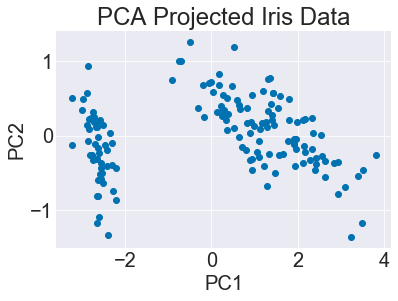

In [4]:
pca_proj = pca.pca_project([0, 1])
plt.scatter(pca_proj[:, 0], pca_proj[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projected Iris Data')
plt.show()

## Task 4: Eigenfaces. Perform PCA on face images using the SVD method

Here, you will implement the Eigenface algorithm, which involves performing PCA on images of human faces. Here is a link to original paper: https://sites.cs.ucsb.edu/~mturk/Papers/jcn.pdf

*Reference:* M. Turk; A. Pentland (1991). "Eigenfaces for recognition" (PDF). *Journal of Cognitive Neuroscience*. 3 (1): 71–86.

### 4a) Load in LFWcrop face dataset

Run the following cell to load in the face images and labels (which celebrity each face is of).

More info about LFWcrop face dataset: http://conradsanderson.id.au/lfwcrop/

In [6]:
face_imgs = np.load('data/lfwcrop.npy')
face_names = np.loadtxt('data/lfwcrop_ids.txt', dtype=str, delimiter='\n')

print(f'There are {len(face_imgs)} faces. There should be 13231.')
print(f'Shape of images is are {face_imgs.shape} faces. It should be (13231, 64, 64).')
print(f'Names of faces match the number of face images? {np.all(len(face_names) == len(face_imgs))}')

There are 13231 faces. There should be 13231.
Shape of images is are (13231, 64, 64) faces. It should be (13231, 64, 64).
Names of faces match the number of face images? True


### 4b) Look at the face data

- In the cell below, fill in the function to create a 5x5 subplots grid of plots. In each plot, show one of the first 25 images in the dataset. For the title of the plot, use the corresponding name of the celebrity whose face. For showing the image, use `imshow`: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html13231
- Run the function to create the plot of the faces below.
- When you call `imshow`, add this optional parameter (otherwise faces look ghastly): `cmap=plt.get_cmap('gray')`
- Turn off the x and y ticks (they just add clutter).
- **Before moving on, make sure that the celebrity names match the image!**

In [4]:
def face_plot(face_imgs, face_names):
    '''Create a 5x5 grid of face images
    
    Parameters:
    -----------
    face_imgs: ndarray. shape=(N, img_y, img_x).
        Grayscale images to show.
    face_names: ndarray. shape=(N,).
        Names of the person in each image represented as strings.
    
    TODO:
    - Create a 5x5 grid of plots of a legible size
    - In each plot, show the grayscale image and make the title the person's name.
    '''
    fig, axs = plt.subplots(5, 5, figsize=(12, 12))

    idx = 0
    for i in range(5):
        for j in range(5):
            axs[i, j].imshow(face_imgs[idx], cmap=plt.get_cmap('gray'))
            axs[i, j].set_title(face_names[idx], fontsize = 15)
            # Turn off tick labels
            axs[i, j].set_xticks([])
            axs[i, j].set_yticks([])
            idx += 1

    plt.show()

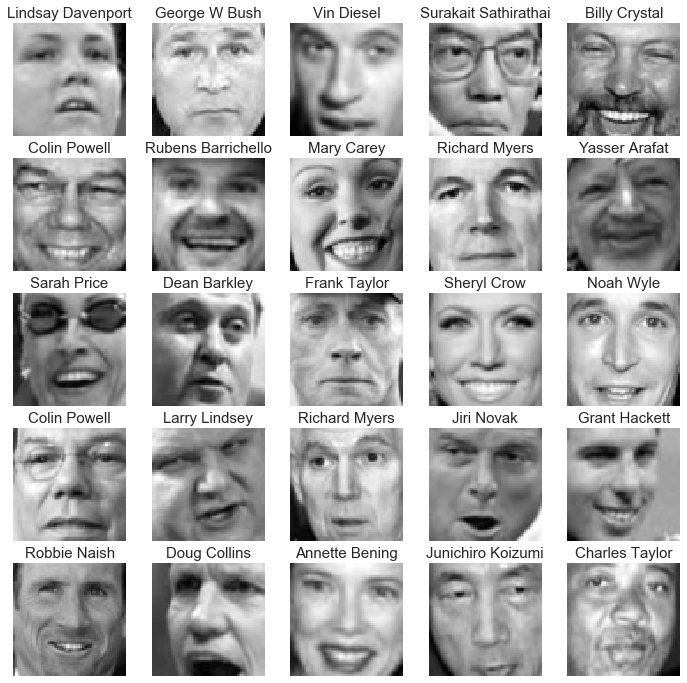

In [7]:
face_plot(face_imgs, face_names)

### 4c) Visualize the "mean face"

- Take the mean face image across the dataset and show it below.

NOTE: Use the same `cmap` parameter as above and turn off x and y tick marks.

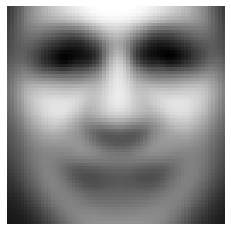

In [7]:
mean_face = np.mean(face_imgs, axis = 0)
plt.imshow(mean_face, cmap=plt.get_cmap('gray'))
plt.xticks([])
plt.yticks([])
plt.show()

**Question 6:** What does the "mean face" image represent?

**Question 6 answer:**<br>
The mean face represents the averaged facial structures/features of all the face images.

### 4d) Preprocess face data

Currently, the face data has shape = `(13231, 64, 64)`. To run PCA, we'll need to "unravel" each row of pixels and glue them into one big vector so that the shape = `(13231, 64*64)` = `(13231, 4096)`. This will make a standard matrix and should work with your PCA code.

- Reshape the face data to make this so. **Do NOT hard code ANY part of the (13231, 64*64)!**

In [8]:
# Your reshape code here
d1, d2, d3 = face_imgs.shape
face_imgs_vec = face_imgs.reshape((d1, -1))
print(f'Your reshaped face images have shape={face_imgs_vec.shape} and it should be (13231, 4096).')

Your reshaped face images have shape=(13231, 4096) and it should be (13231, 4096).


### 4e) Perform PCA (SVD) on preprocessed face data

- Create pandas DataFrame object that holds the face data. The header names of consecutive integers `0, 1, ..., 4095` are fine.
- Create `PCA_SVD` object that holds the face DataFrame.
- Run PCA. For `vars` pass in a Python list of ints (`0, 1, ..., 4095`).

NOTE: This is not a "toy" dataset so it might take a few minutes to finish computing.
- Use the python `time` module (i.e. `import time`) to time how long the `pca` method takes to finish processing the data, then print out the time elapsed below. If this takes more than a few minutes, something probably is wrong.

In [9]:
import time
face_df = pd.DataFrame(face_imgs_vec)
pca = pca_svd.PCA_SVD(face_df)
intList = np.arange(0, 4096)
start_time = time.time()
pca.pca(intList)
end_time = time.time()
print("time elapsed:", end_time - start_time, "seconds")

time elapsed: 138.1082739830017 seconds


### 4f) Make face PCA elbow plot

- Make an elbow plot of the PCA results.
- You should readily notice that it is challenging to see how many PCs are required before the curve plateaus. Update your plot below with a reasonable number of PCs to show in order to focus on the curve before it plateaus.

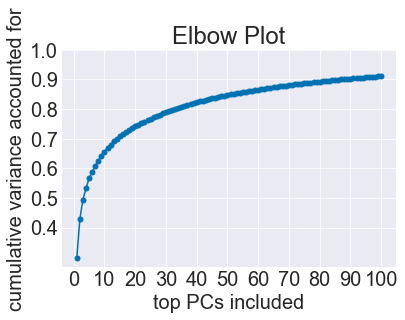

In [10]:
pca.elbow_plot(num_pcs_to_keep=100)
plt.xticks(np.arange(0, 110, step=10))
plt.yticks(np.arange(0.4, 1.1, step=0.1))
plt.show()

### 4g) Reconstruct faces using the principal components

Use your elbow plot to find the number of top principal components required to *approximately* explain the following cumulative proportion of the variance:
- 50%
- 70%
- 80%
- 95%


- For each of the above number of PCs, project them back onto the original data space.
- Write then use the below `make_imgs` function to convert the projected data back to image shapes `(13231, 64, 64)`.
- Use `face_plot` to plot the reconstructed faces for each of the variance numbers above.

**There should be 4 5x5 plots below**

In [11]:
def make_imgs(reconstucted_imgs):
    '''Inflates a 1D feature vector representation of images into 2D images for plotting.
    Assumes square images
    
    Parameters:
    -----------
    reconstucted_imgs: ndarray. shape=(N, img_y*img_x)
        1D vector representation of each image
    
    Returns:
    -----------
    ndarray. shape=(N, img_y, img_x)
        The images inflated into 2D
    '''
    d1, d2 = reconstucted_imgs.shape
    d3 = int(math.sqrt(d2))
    orig_imgs = reconstucted_imgs.reshape(d1, d3, d3)
    return orig_imgs

#### 50% variance face grid

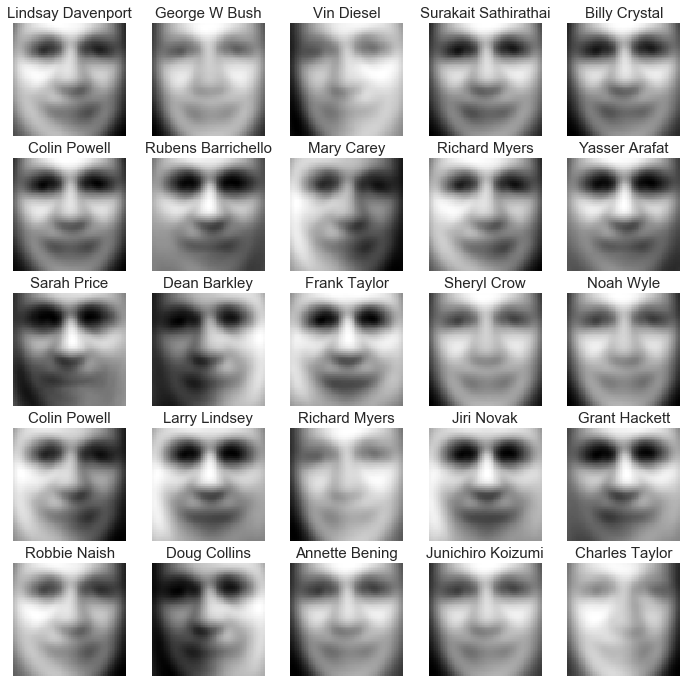

In [12]:
proj_1 = pca.pca_then_project_back(3)
face_imgs_1 = make_imgs(proj_1)
face_plot(face_imgs_1, face_names)

#### 70% variance face grid

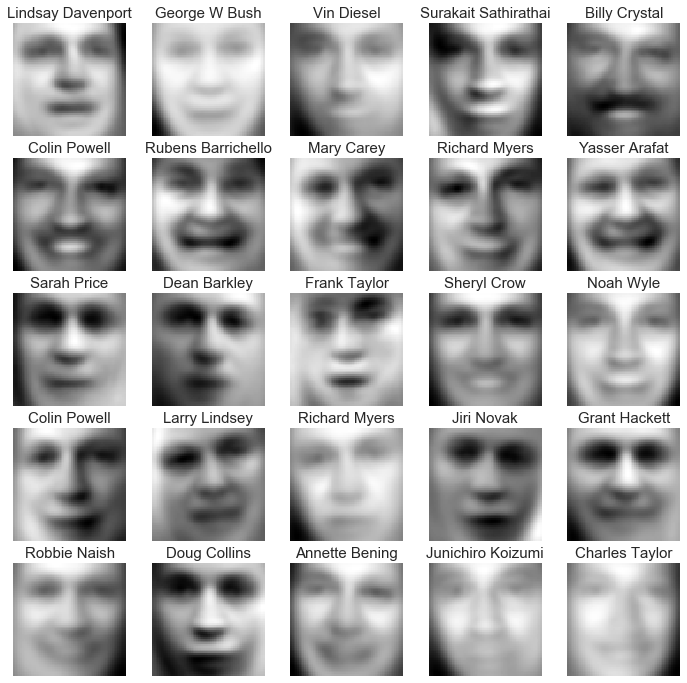

In [13]:
proj_2 = pca.pca_then_project_back(14)
face_imgs_2 = make_imgs(proj_2)
face_plot(face_imgs_2, face_names)

#### 80% variance face grid

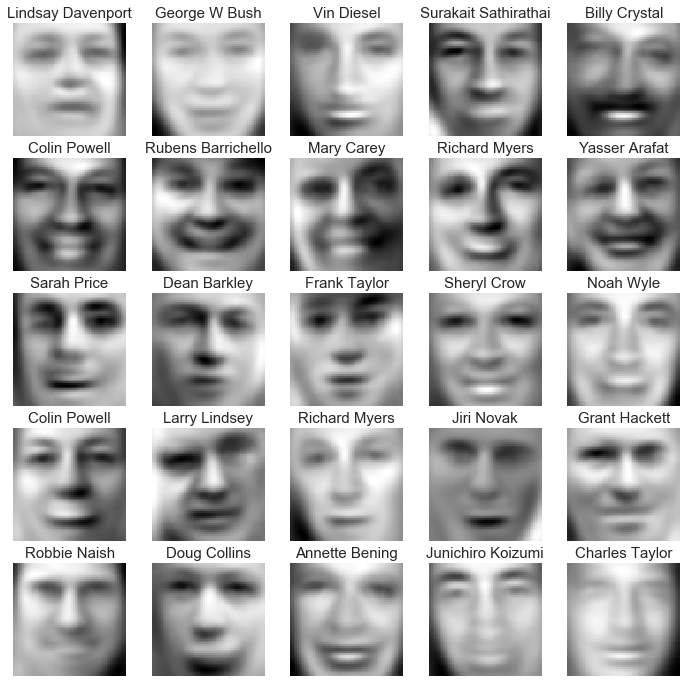

In [14]:
proj_3 = pca.pca_then_project_back(32)
face_imgs_3 = make_imgs(proj_3)
face_plot(face_imgs_3, face_names)

#### 95% variance face grid

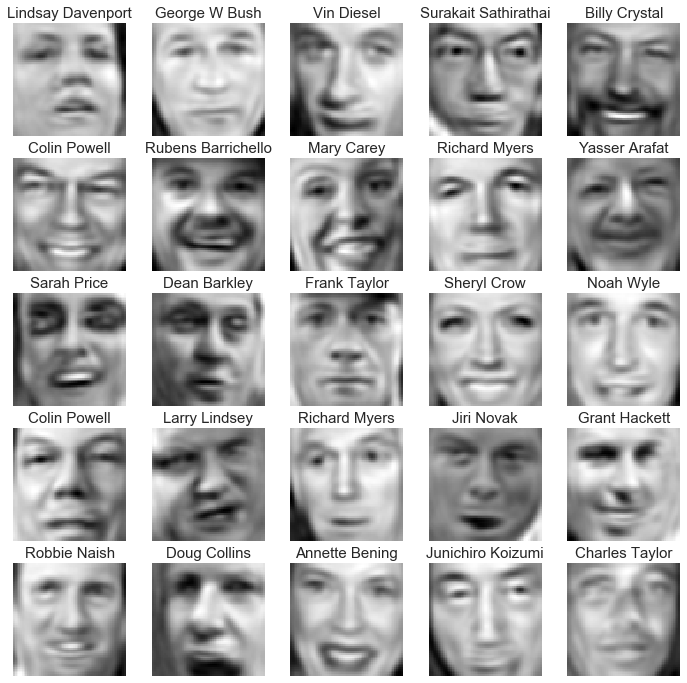

In [15]:
proj_4 = pca.pca_then_project_back(175)
face_imgs_4 = make_imgs(proj_4)
face_plot(face_imgs_4, face_names)

**Question 7:** Briefly interpret the face reconstruction with the above choices of proportion variance explained.

**Question 7 answer:**<br>
The proportion variance accounted for increases as the number of PCs included increases. The face images become clearer and show more details and personal features when we keep more PCs.<br>
After a threshold near where the curve starts to plateau, the changes of the images become more subtle because the cumulative variance accounted for differ less from each other.

## Task 5: Compare covariance matrix and SVD approaches on the face dataset

### 5a) Time comparison with covariance matrix method

- In the cell below, run PCA on the face data using the convariance matrix method. Time the processing time in `pca` using the `time` module, like you did in Task 4 with SVD. 

In [10]:
pcaCOV = pca_cov.PCA_COV(face_df)
intList = np.arange(0, 4096)
start_time = time.time()
pcaCOV.pca(intList)
end_time = time.time()
print('time elapsed:', end_time - start_time, 'seconds')

time elapsed: 82.45961594581604 seconds


**Question 8:** How many seconds did it take to process the face dataset with the covariance method? How about with the SVD method? **Include both numbers, along with units**.

**Question 8 answer:**<br>
COV time: 74.9 seconds<br>
SVD time: 175.2 seconds

### 5b) Stability comparison

In the cell below compute the difference between:
- eigenvalues
- eigenvectors

obtained from the two approaches. Sum up the **absolute differences** and print out the resulting float value.

In [11]:
svd_evals = pca.get_eigenvalues()
cov_evals = pcaCOV.get_eigenvalues()
svd_evecs = pca.get_eigenvectors()
cov_evecs = pcaCOV.get_eigenvectors()
print('\ndifference between eigenvalues:\n', svd_evals - cov_evals)
print('\ndifference between eigenvectors:\n', svd_evecs - cov_evecs)
sum_val = np.sum(abs(svd_evals - cov_evals))
print('\nsum of absolute differences between eigenvalues:', sum_val)
sum_vec = np.sum(abs(svd_evecs - cov_evecs))
print('\nsum of absolute differences between eigenvalues:', sum_vec)


difference between eigenvalues:
 [ 0.      -0.      -0.      ... -0.08529 -0.08196 -0.08542]

difference between eigenvectors:
 [[ 0.       0.      -0.04539 ... -0.00523 -0.0038   0.00031]
 [ 0.       0.      -0.04276 ...  0.01772  0.00927 -0.00337]
 [-0.      -0.      -0.03921 ... -0.02108 -0.0154   0.0055 ]
 ...
 [ 0.      -0.      -0.07476 ... -0.00312  0.00264 -0.00335]
 [ 0.      -0.      -0.07542 ... -0.       0.00423  0.0042 ]
 [ 0.      -0.      -0.07572 ... -0.00048 -0.00381 -0.00463]]

sum of absolute differences between eigenvalues: 723.878275473055

sum of absolute differences between eigenvalues: 269832.3593701363


**Question 9:** If you consider SVD as producing the "correct" result, what do the above float value discrepencies obtained between the two methods mean?

**Question 9 answer:**<br>
The sum of absolute differences suggests the results obtained from the two methods are different. If they are equally stable in computation, then the difference will be small. However, the covariance matrix method is not numerically stable compared to the SVD method.<br>
The discrepencies reflect the degree of the numerical instablility using the COV method.

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

**Note about CSV files:** Please try if at all possible to use pandas `read_csv` method with the URL argument in your submitted notebook extensions (should be possible if you downloaded your CSV file off the internet). This way, graders will be able to download the same data and you won't have to remember to copy over the CSV file with your project submission (this is welcome too). Remember the 10MB rule though for filer submissions.

### 1. Your own dataset

- Do PCA on a dataset of your choice. Use any of the canonical analysis tools (e.g. elbow plot, loading plot, proportion variance explained, etc) to inform your analysis and exploration. 
- Do PCA and SVD based PCA yield different results?

I used a auto MPG dataset from https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv.

#### COV method

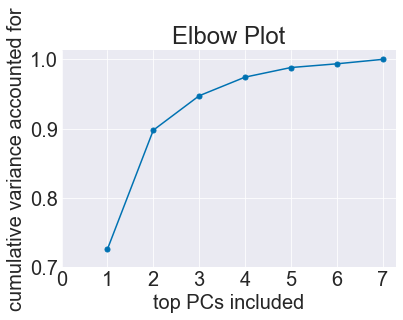

In [18]:
auto_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv')
auto_df = pd.DataFrame(auto_data).dropna()
auto_pca = pca_cov.PCA_COV(auto_df)
auto_pca.pca(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model-year'], normalize=True)

# elbow plot
auto_pca.elbow_plot(num_pcs_to_keep=None)
plt.xticks(np.arange(0, 8, step=1))
plt.yticks(np.arange(0.7, 1.05, step=0.1))
plt.show()

<br>

I choose to preserve the top 2 PCs, and the cumulative variance accounted for is 90%.

<br>

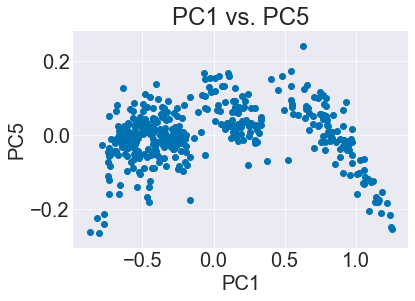

In [20]:
# Visualization (plot) of PCA projected data on the 1st and 5th PCs.

auto_pca_proj = auto_pca.pca_project([0, 4])
plt.scatter(auto_pca_proj[:, 0], auto_pca_proj[:, 1])
plt.title('PC1 vs. PC5')
plt.xlabel('PC1')
plt.ylabel('PC5')
plt.show()

#### Loading Plot

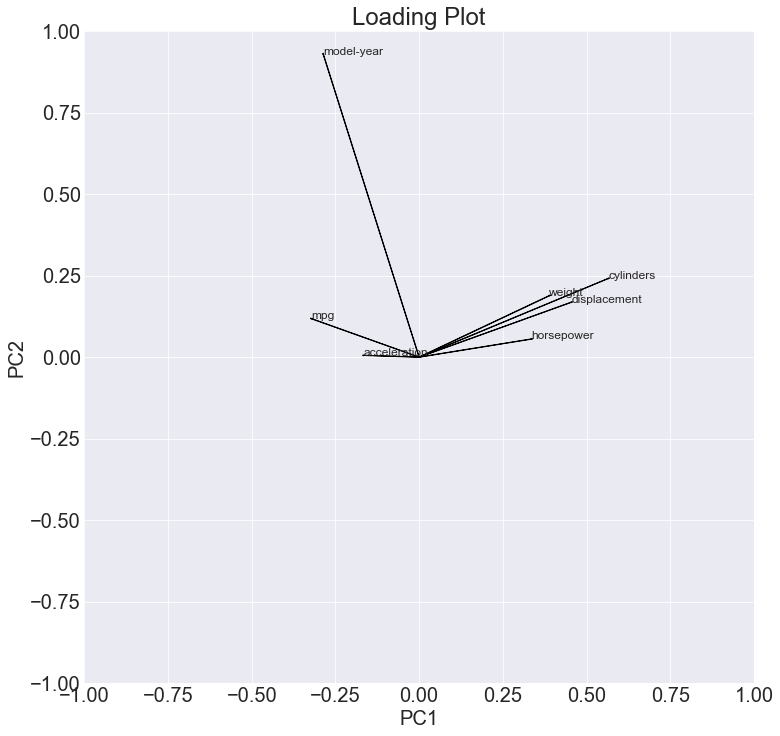

In [21]:
auto_pca.loading_plot()
plt.show()

The loading plot tells us what the first two PCs measure with respect to the original data axes.

PC1 is positively associated with horsepower and displacement, and is negatively associated with acceleration and mpg.<br>
PC2 is positively associated with model year.<br>

It also tells us about correlations among the original data axes.

The angle between weight, cylinders is very small, which makes sense, because a car is heavier with a higher number of cylinders.<br> A 4-cylinder engine weigh about 300lbs, and an 8-cylinder engine weigh nearly 600lbs.<br>

According to the plot, the angle between acceleration and horsepower is about 180 degrees, suggesting the two variables are negatively correlated, which contradicts our common sense--a car accelerates faster with more horsepower.<br>

The angles between model year and other variables are close to 90 degrees, which indicates the model year is not correlated to the other variables.

The vectors representing MPG and weight form an obtuse angle, suggestng that the miles per gallon decreases as the car weight increases.<br>

The angle between MPG and horsepower is close to 180 degrees, showing that the miles per gallon decreases as the horsepower increases.<br>

Similarly, a lower number of cylinders corresponds to higher miles per gallon.<br>


#### SVD method

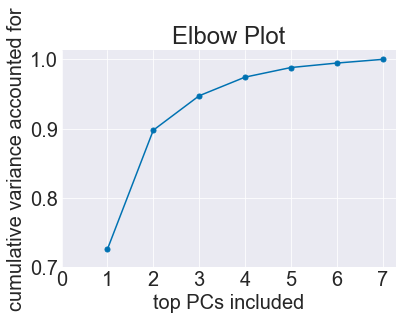

In [21]:
# SVD
auto_pca_svd = pca_svd.PCA_SVD(auto_df)
auto_pca_svd.pca(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model-year'], normalize=True)
auto_pca_svd.elbow_plot(num_pcs_to_keep=None)
plt.xticks(np.arange(0, 8, step=1))
plt.yticks(np.arange(0.7, 1.05, step=0.1))
plt.show()

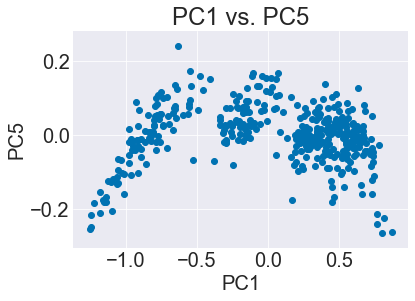

In [22]:
auto_pca_proj_svd = auto_pca_svd.pca_project([0, 4])
plt.scatter(auto_pca_proj_svd[:, 0], auto_pca_proj_svd[:, 1])
plt.title('PC1 vs. PC5')
plt.xlabel('PC1')
plt.ylabel('PC5')
plt.show()

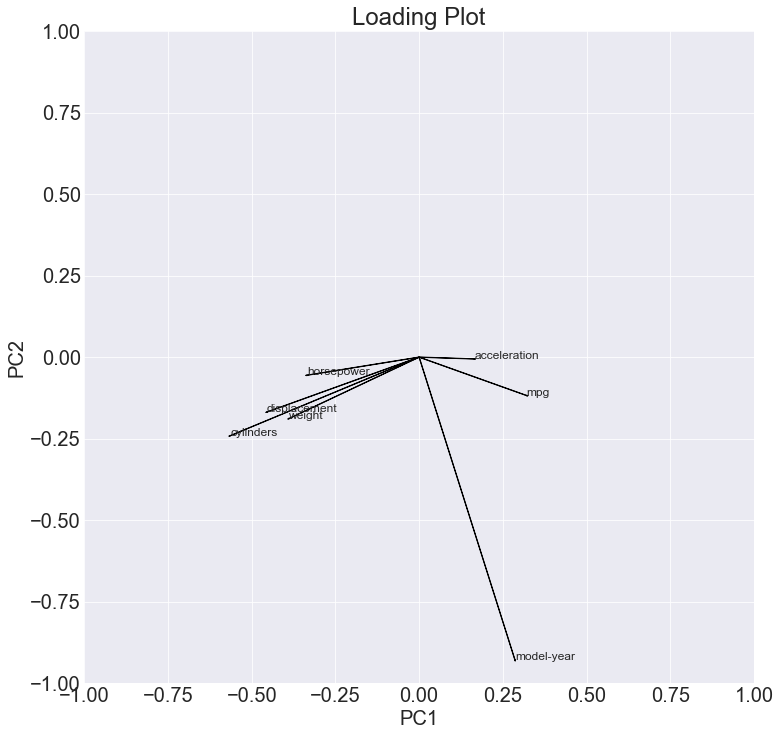

In [23]:
auto_pca_svd.loading_plot()
plt.show()

The elbow plots using the COV and the SVD methods are identical.<br>
However, the scatter plots and loading plots generated using the two different methods seem to be inverses.<br>
The shapes look the same, but are reflected about a principal component axis.

### 2. Image compression

- Run PCA on your own images and analyze the trade-off in compression and reconstruction error.

I downloaded 25 images from http://www.news.cn/politics/leaders/ and created an image array using Pillow.

In [12]:
from PIL import Image

# create a 5x5 array to hold 64x64 images
img_arr = np.zeros([25, 64, 64])

# convert each image to grayscale, resize it, and add it to array
for i in range (25):
    img_name = 'img/im' + str(i) + '.jpg'
    im = Image.open(img_name)
    im = im.convert(mode='L')    # convert RGB to grayscale
    im = im.resize((64, 64))
    im = np.array(im, dtype=float)    # convert Image object to ndarray
    img_arr[i] = im    # add images into the array

# create a name array [0...24]
name_arr = np.arange(25)

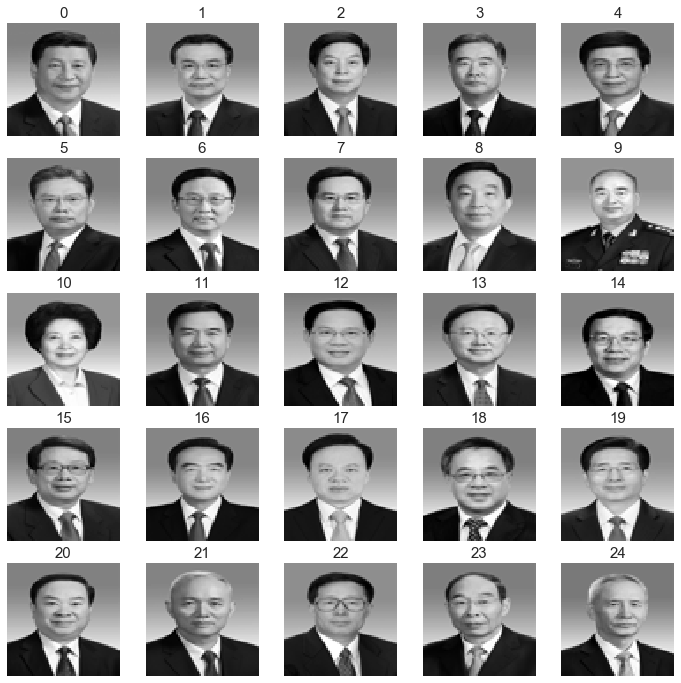

In [13]:
face_plot(img_arr, name_arr)

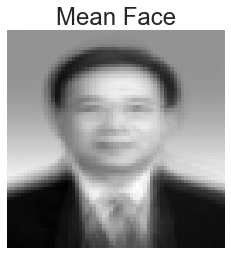

In [25]:
# Visualize mean face

mean_face = np.mean(img_arr, axis = 0)
plt.imshow(mean_face, cmap=plt.get_cmap('gray'))
plt.xticks([])
plt.yticks([])
plt.title('Mean Face')
plt.show()

In [14]:
# Preprocess face data

d1, d2, d3 = img_arr.shape
face_imgs_vec = img_arr.reshape((d1, -1))
print(face_imgs_vec.shape)

(25, 4096)


In [15]:
# Perform PCA(SVD) on preprocessed face data

face_df = pd.DataFrame(face_imgs_vec)
pca = pca_svd.PCA_SVD(face_df)
start_time = time.time()
pca.pca(np.arange(0, 4096))
end_time = time.time()
print("time elapsed using SVD:", end_time - start_time, "seconds")

time elapsed using SVD: 1.2013330459594727 seconds


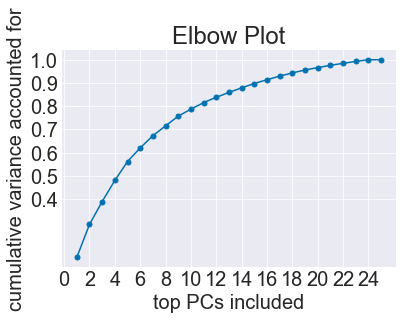

In [82]:
# Make face PCA elbow plot

pca.elbow_plot()
plt.xticks(np.arange(0, 26, step=2))
plt.yticks(np.arange(0.4, 1.1, step=0.1))
plt.show()

#### Reconstruct faces using the principal components
The numbers of top principal components required to approximately explain the following cumulative proportion of the variance are:<br>
40% : 3<br>
70% : 8<br>
85% : 13<br>
95% : 18<br>

#### 40% variance face grid - 3 PCs

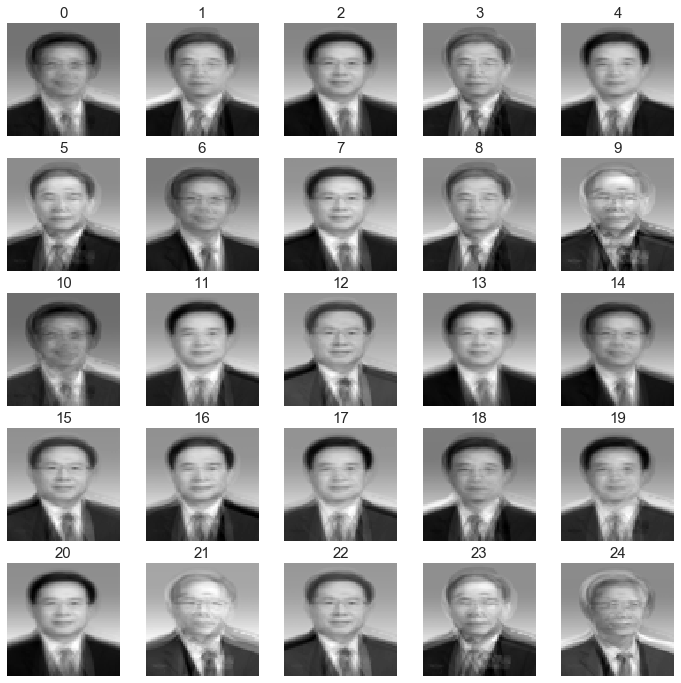

In [83]:
proj_40 = pca.pca_then_project_back(3)
face_imgs_40 = make_imgs(proj_40)
xi_1 = face_imgs_40[0]
face_plot(face_imgs_40, name_arr)

#### 70% variance face grid - 8 PCs

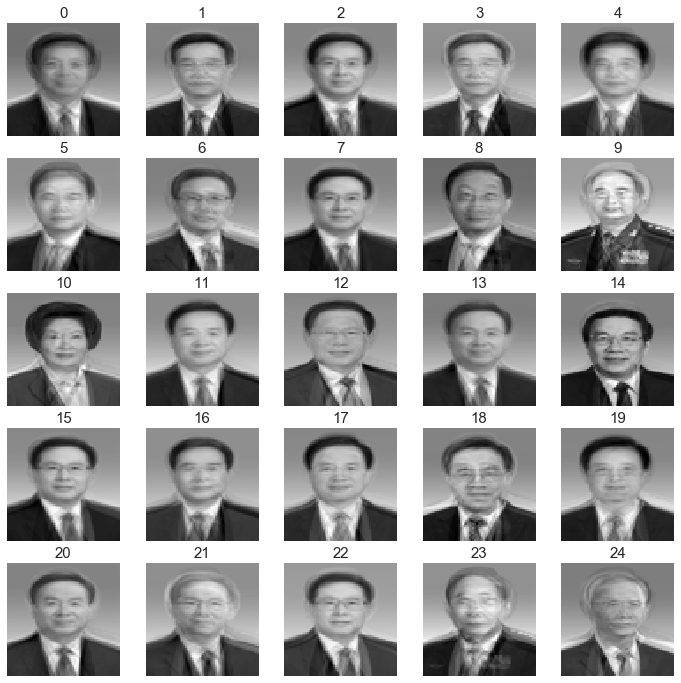

In [30]:
proj_70 = pca.pca_then_project_back(8)
face_imgs_70 = make_imgs(proj_70)
xi_2 = face_imgs_70[0]
face_plot(face_imgs_70, name_arr)

#### 85% variance face grid - 13 PCs

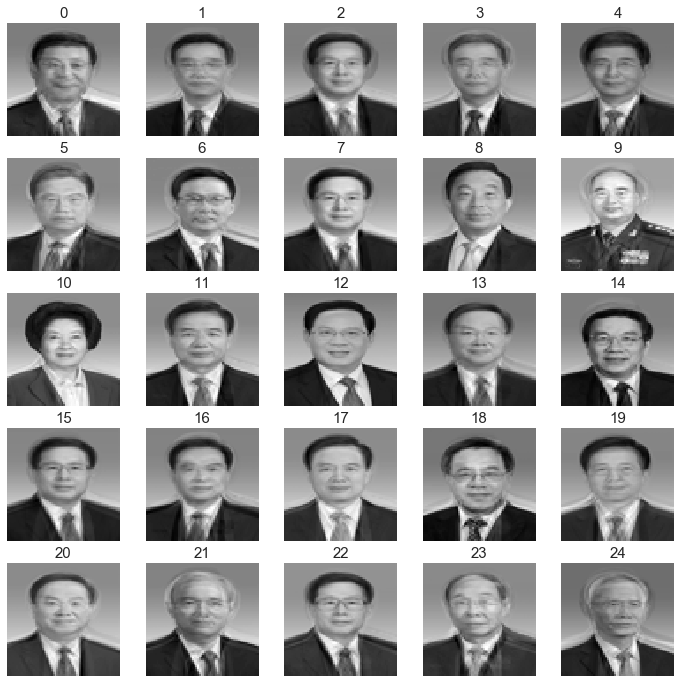

In [31]:
proj_85 = pca.pca_then_project_back(13)
face_imgs_85 = make_imgs(proj_85)
xi_3 = face_imgs_85[0]
face_plot(face_imgs_85, name_arr)

#### 95% variance face grid - 18 PCs

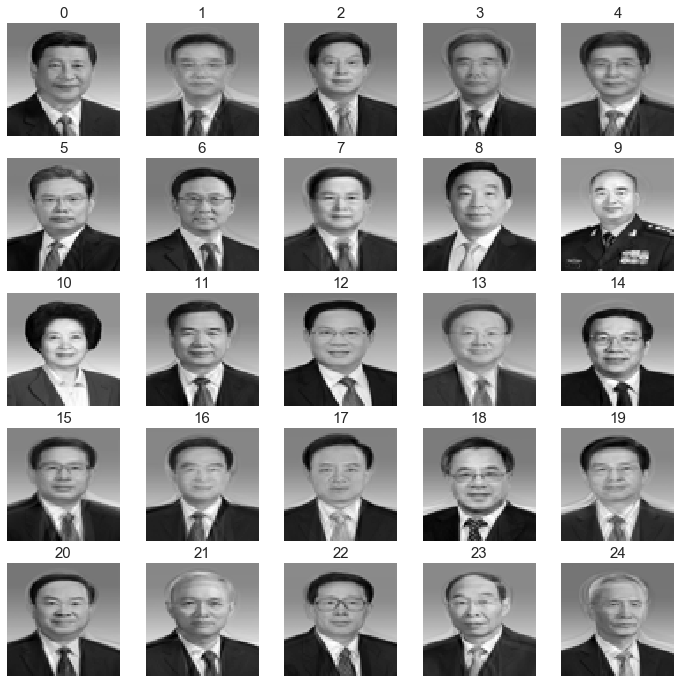

In [76]:
proj_95 = pca.pca_then_project_back(18)
face_imgs_95 = make_imgs(proj_95)
xi_4 = face_imgs_95[0]
face_plot(face_imgs_95, name_arr)

When we keep more PCs, the cumulative variance accounted for increases. The deviation from the mean face gets larger, so each face becomes more 'individualized.'<br>
More details and features emerge, such as glasses.<br>

Of the 25 faces, only one--face number 10--belongs to a female.<br>
When we use only 3 PCs to reconstruct the faces, we cannot tell that person 10 is a female, because the first three are male, their facial and hair features weigh more, overshadowing the feminine features.

##### Replacing face 0 with face 10 to see the change:

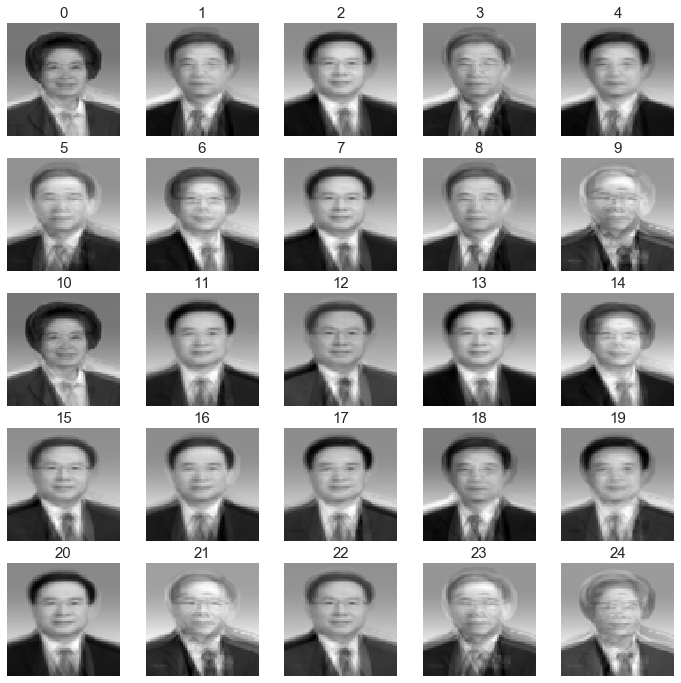

In [57]:
# replace face 0 with face 10
img_arr[10] = img_arr[0]

d1, d2, d3 = img_arr.shape
face_imgs_vec = img_arr.reshape((d1, -1))

new_face_df = pd.DataFrame(face_imgs_vec)
new_pca = pca_svd.PCA_SVD(new_face_df)
new_pca.pca(np.arange(0, 4096))

new_proj_40 = new_pca.pca_then_project_back(3)
new_face_imgs_40 = make_imgs(proj_40)
face_plot(new_face_imgs_40, name_arr)

We still include the first 3 PCS, but the lady keeps her features pretty well.<br>
And the last face is heavily influenced by her facial structure.

#### Visualize the gradual change of President Xi with an increasing number of PCs included

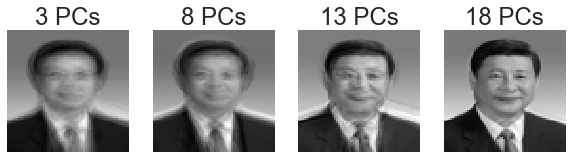

In [60]:
plt.figure(figsize=(10, 5))

ax1 = plt.subplot(141)
ax1.imshow(xi_1, cmap=plt.get_cmap('gray'))
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('3 PCs')

ax2 = plt.subplot(142)
ax2.imshow(xi_2, cmap=plt.get_cmap('gray'))
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('8 PCs')

ax3 = plt.subplot(143)
ax3.imshow(xi_3, cmap=plt.get_cmap('gray'))
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_title('13 PCs')

ax4 = plt.subplot(144)
ax4.imshow(xi_4, cmap=plt.get_cmap('gray'))
ax4.set_xticks([])
ax4.set_yticks([])
ax4.set_title('18 PCs')

plt.show()

The first image still preserves features from other faces like glasses. As the number of PCs increases, his own features become clearer.

### Compare covariance matrix and SVD approaches on a small face dataset

##### Time comparison with covariance matrix method

In [16]:
pcaCOV = pca_cov.PCA_COV(face_df)
start_time = time.time()
pcaCOV.pca(np.arange(0, 4096))
end_time = time.time()
print('time elapsed using COV:', end_time - start_time, 'seconds')

time elapsed using COV: 41.87989139556885 seconds


SVD time: 1.02 sec<br>
COV time: 48.08 sec<br>

On a small dataset, the SVD approach is much faster than the covariance matrix method, which is different from the result obtained from the previous large face dataset. Using the SVD method is more time-efficient when doing PCA on small datasets. The trade-off between speed and accuracy is more remarkable for large datasets.

#### Credit:
Oliver<br>
Hannah<br>
Roujia